In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
source_dir = '/mnt/c/Users/natra/Documents/Research/Iraq-post-conflict-rebel-governance'
monthly_adm3_geo_file = source_dir + '/data/combined/monthly_adm3_data.geojson'

In [3]:
month_adm3_data = gpd.read_file(monthly_adm3_geo_file)

(294, 6)


Text(0.5, 1.0, 'Sunni Status of Admin Areas, from GeoEPR')

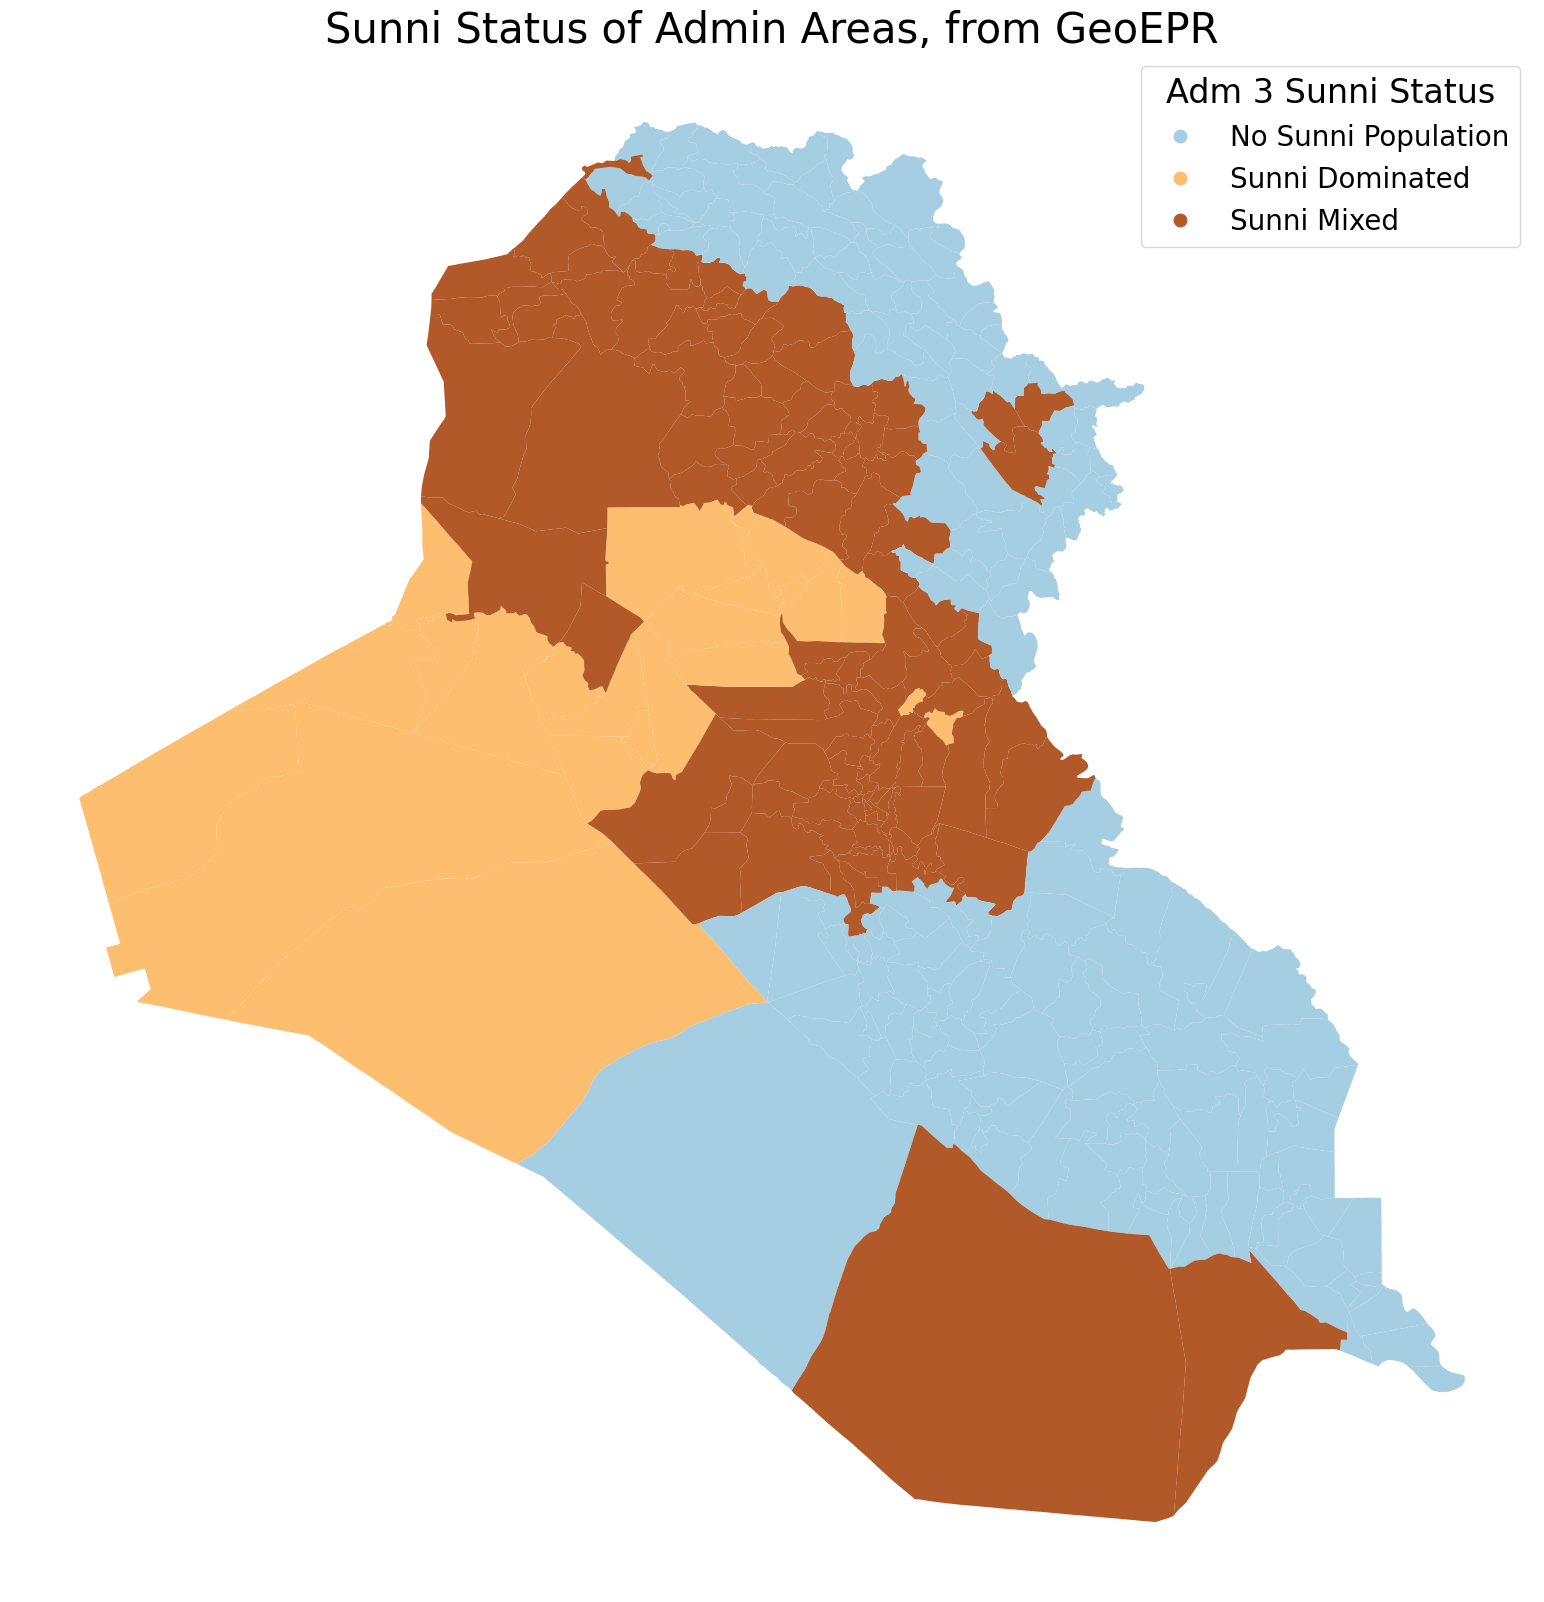

In [4]:
eth_df = month_adm3_data.loc[:,('ADM3_PCODE','ADM3_EN','geometry','sunni_dom','sunni_mix','no_sunni')]
eth_df = eth_df.drop_duplicates()
print(eth_df.shape)
eth_df['sunni_status'] = np.where(eth_df['sunni_dom']==1, 'Sunni Dominated',
                                  np.where(eth_df['sunni_mix']==1,'Sunni Mixed',
                                np.where(eth_df['no_sunni']==1, 'No Sunni Population',
                                         'Undefined')))

fig, ax = plt.subplots(1,1,figsize=(20,20))

eth_df.plot(column='sunni_status',legend=True, ax=ax,
                 cmap='Paired', 
                 missing_kwds={'color':'lightgrey',
                               'label':'NA'},
                 legend_kwds={'fontsize':20,
                              'title':'Adm 3 Sunni Status',
                              'title_fontsize':24})
ax.set_axis_off()
plt.title("Sunni Status of Admin Areas, from GeoEPR",fontsize=30)

In [5]:
month_adm3_data.columns

Index(['ADM3_EN', 'month', 'mean_evi', 'mean_evi_scaled', 'max_evi',
       'max_evi_scaled', 'ACTION_IND', 'ACTION_DIR', 'ACTION_PRT', 'mean_ndvi',
       'mean_ndvi_scaled', 'max_ndvi', 'max_ndvi_scaled', 'pop_count',
       'pop_density', 'disputed_area', 'iom_attacked', 'iom_occupied',
       'isil_ingroup_prior', 'isil_ingroup_curr', 'retaken_year',
       'retaken_post_2016', 'iom_no_isil_action', 'sunni_dom', 'sunni_mix',
       'no_sunni', 'occ_start_month', 'occ_end_month', 'occ_length_mon',
       'ucdp_nonisis_events_adm1prec', 'ucdp_isis_events_adm1prec',
       'ucdp_all_events_adm1prec', 'ucdp_nonisis_events_adm2prec',
       'ucdp_isis_events_adm2prec', 'ucdp_all_events_adm2prec',
       'ucdp_nonisis_events_adm3prec', 'ucdp_isis_events_adm3prec',
       'ucdp_all_events_adm3prec', 'Shape_Area', 'ADM3_AR', 'ADM3_PCODE',
       'ADM2_EN', 'ADM2_AR', 'ADM2_PCODE', 'ADM1_EN', 'ADM1_AR', 'ADM1_PCODE',
       'geometry'],
      dtype='object')

In [10]:
potential_fieldwork_areas = month_adm3_data[month_adm3_data['sunni_dom']==1]
potential_fieldwork_areas = potential_fieldwork_areas[['ADM3_EN','month','occ_length_mon',
                                                       'max_evi_scaled']]

In [11]:
potential_fieldwork_areas

,ADM3_EN,month,occ_length_mon,max_evi_scaled
264,Abu Dalf,2001-01-31,1.0,0.1376
265,Abu Dalf,2001-02-28,1.0,0.1851
266,Abu Dalf,2001-03-31,1.0,0.1721
267,Abu Dalf,2001-04-30,1.0,0.2258
268,Abu Dalf,2001-05-31,1.0,0.2892
...,...,...,...,...
75763,Um Al-Qura,2022-08-31,10.0,0.2990
75764,Um Al-Qura,2022-09-30,10.0,0.3406
75765,Um Al-Qura,2022-10-31,10.0,0.2723
75766,Um Al-Qura,2022-11-30,10.0,0.4377
